# Extracting Data using a Shapefile
#### Sometimes you may want to use a pre-defined shapefile to extract data.  This notebook will demonstrate how to do this and then display it graphically.

## Setup

In [2]:
import os
import warnings

import cartopy.crs as ccrs
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import geopandas as gpd

from clean_air.data import DataSubset

warnings.filterwarnings("ignore", message=".*\*approx\* keyword argument")

In [3]:
SAMPLEDIR = "/data/cap-sample-data"
SHAPEFILE = "/data/shapefiles/PUA_polygons/PUA_polygons.shp"

## Extracting a pre-defined shape

#### Now that your imports and variables are set up, you can read in a shapefile using functions from geopandas.  

#### The input file (SHAPEFILE) that we have used below contains a set of shapes for various regions which can be selected to display.  Here we have selected London and Exeter to display on our plot.  This information can be viewed by calling the variable that defines the shapes, as shown below.

In [5]:
shapefile = gpd.read_file(SHAPEFILE).set_index("PUAName")
shapes = shapefile.geometry[["London", "Exeter"]]
shapes

PUAName
London    POLYGON ((549942.600 215785.900, 549968.100 21...
Exeter    POLYGON ((289271.900 93197.000, 289303.900 932...
Name: geometry, dtype: geometry

#### Now that you have defined your shapes, you can extract the data within them using clean_air's DataSubset functions.

In [6]:
ds = DataSubset(
    {"files": os.path.join(SAMPLEDIR, "model_full", "aqum_hourly_o3_20200520.nc")}
)
cubes = ds.extract_shapes(shapes.geometry[["London", "Exeter"]])

#### Again, information about these data subsets can be viewed by calling the variable which defines it.

In [5]:
cubes

[<iris 'Cube' of mass_concentration_of_ozone_in_air / (ug/m3) (time: 24; projection_y_coordinate: 33; projection_x_coordinate: 41)>,
<iris 'Cube' of mass_concentration_of_ozone_in_air / (ug/m3) (time: 24; projection_y_coordinate: 6; projection_x_coordinate: 5)>]

#### Plotting for shapefiles is very similar to plotting for polygons, although we are now producing multiple plots so we'll loop over them.

#### We start by defining a coordinate reference system using cartopy.  This will apply to all the shapes we intend to plot.

#### Next we loop over the shapes we have selected from our data, and for each shape we set a plotting mode using iris.quickplot.  We also use matplotlib's pyplot library to extract a set of axes, then add coastlines and our shapefile geometries.

#### For more information regarding these plotting options, please see the reference guides below:

https://scitools.org.uk/cartopy/docs/latest/reference/crs.html

https://scitools-iris.readthedocs.io/en/stable/generated/api/iris/quickplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca


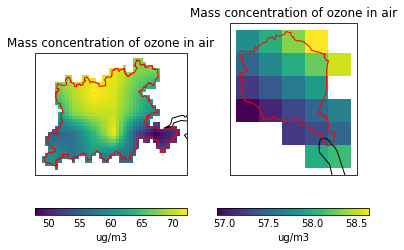

In [7]:
crs = ccrs.OSGB()
for i, (cube, shape) in enumerate(zip(cubes, shapes), 1):
    plt.subplot(1, 2, i)
    qplt.pcolormesh(cube.collapsed("time", iris.analysis.MEAN))
    ax = plt.gca()
    ax.coastlines()
    ax.add_geometries([shape], crs=crs, facecolor="none", edgecolor="red")
plt.show()